<a href="https://colab.research.google.com/github/gulmert89/dsBootcamp/blob/master/odev95_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9.5 - Kümeleme Algoritmaları: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
## Ödev:
Bu ödevde, UC Irvine Machine Learning Repository'de bulunan [kalp hastalığı verisi](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) ile çalışacaksınız.

Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

<code># Define the features and the outcome<br>
X = heartdisease_df.iloc[:, :13]<br>
y = heartdisease_df.iloc[:, 13]<br></code>

<code># Replace missing values (marked by ?) with a 0<br>
X = X.replace(to_replace='?', value=0)<br></code>

<code># Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis<br>
y = np.where(y > 0, 0, 1)<br></code>

Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

Ödevi tamamlamak için aşağıdaki soruların cevabını içeren Jupyter notebook'u sisteme yükleyiniz:

1) Değişik eps ve min_samples değerleri deneyerek DBSCAN metodunu uygulayın. İki kümeli çözüm üretmenin pek kolay olmadığını göreceksiniz.

2) eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, min_samples değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

3) eps = 1, min_samples = 1, metric =" euclidean " şeklinde parametreleri ayarlayarak DBSCAN uygulayın. Ardından, eps değerini artırın. Artışın kümelerinin sayısı üzerindeki etkisi nedir?

---
---
---
## Soru 1

In [1]:
# mounting the Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.model_selection import train_test_split
#from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN
#from scipy.cluster.hierarchy import dendrogram, linkage

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
path = "/content/drive/My Drive/MertColab/odevler/Cleveland.data"
heart_disease = pd.read_csv(path, sep=",", names=columns)
del columns, path

In [4]:
heart_disease.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
# preprocess
x1 = heart_disease.iloc[:, :13]
y1 = heart_disease.iloc[:, 13]

x1 = x1.replace(to_replace="?", value=0)
x1 = x1.astype("float64")
y1 = np.where(y1>0, 1, 0)

scaler = StandardScaler()
x1_std = scaler.fit_transform(x1)

# PCA
pca_model1 = PCA(n_components=2, random_state=42)
x1_pca = pca_model1.fit_transform(x1_std)

In [7]:
# as a side note, let's see the variance ratios
print("Variance Ratios: {}".format(pca_model1.explained_variance_ratio_))

Variance Ratios: [0.23630818 0.12281689]


In [8]:
def dbscan_predict(eps=0.5, min_samples=5, show_figure=True):
    # arrange the model
    dbscan_cluster = DBSCAN(eps=eps, min_samples=min_samples, 
                            metric="euclidean", n_jobs=-1)
    # fit the model to get the predictions
    y1_prediction = dbscan_cluster.fit_predict(x1_std)

    # visualise the output
    if show_figure:
        plt.figure(figsize=(8, 5))
        colors = "rbg"
        for i in range(x1_pca.shape[0]):
            plt.text(x=x1_pca[i, 0], y=x1_pca[i, 1], s=str(y1_prediction[i]), 
                    color=colors[y1[i]], fontdict={"weight":"bold", "size":30})

        plt.xticks([])
        plt.yticks([])
        plt.axis("off")
        plt.show()

        # prediction values and their counts
        predict_count = list(zip(np.unique(y1_prediction, return_counts=True)[0], 
                                np.unique(y1_prediction, return_counts=True)[1]))
        print("The (Prediction & Count) pairs:\n", predict_count)

    return y1_prediction
    # colors are true values where numbers reflect predictions 

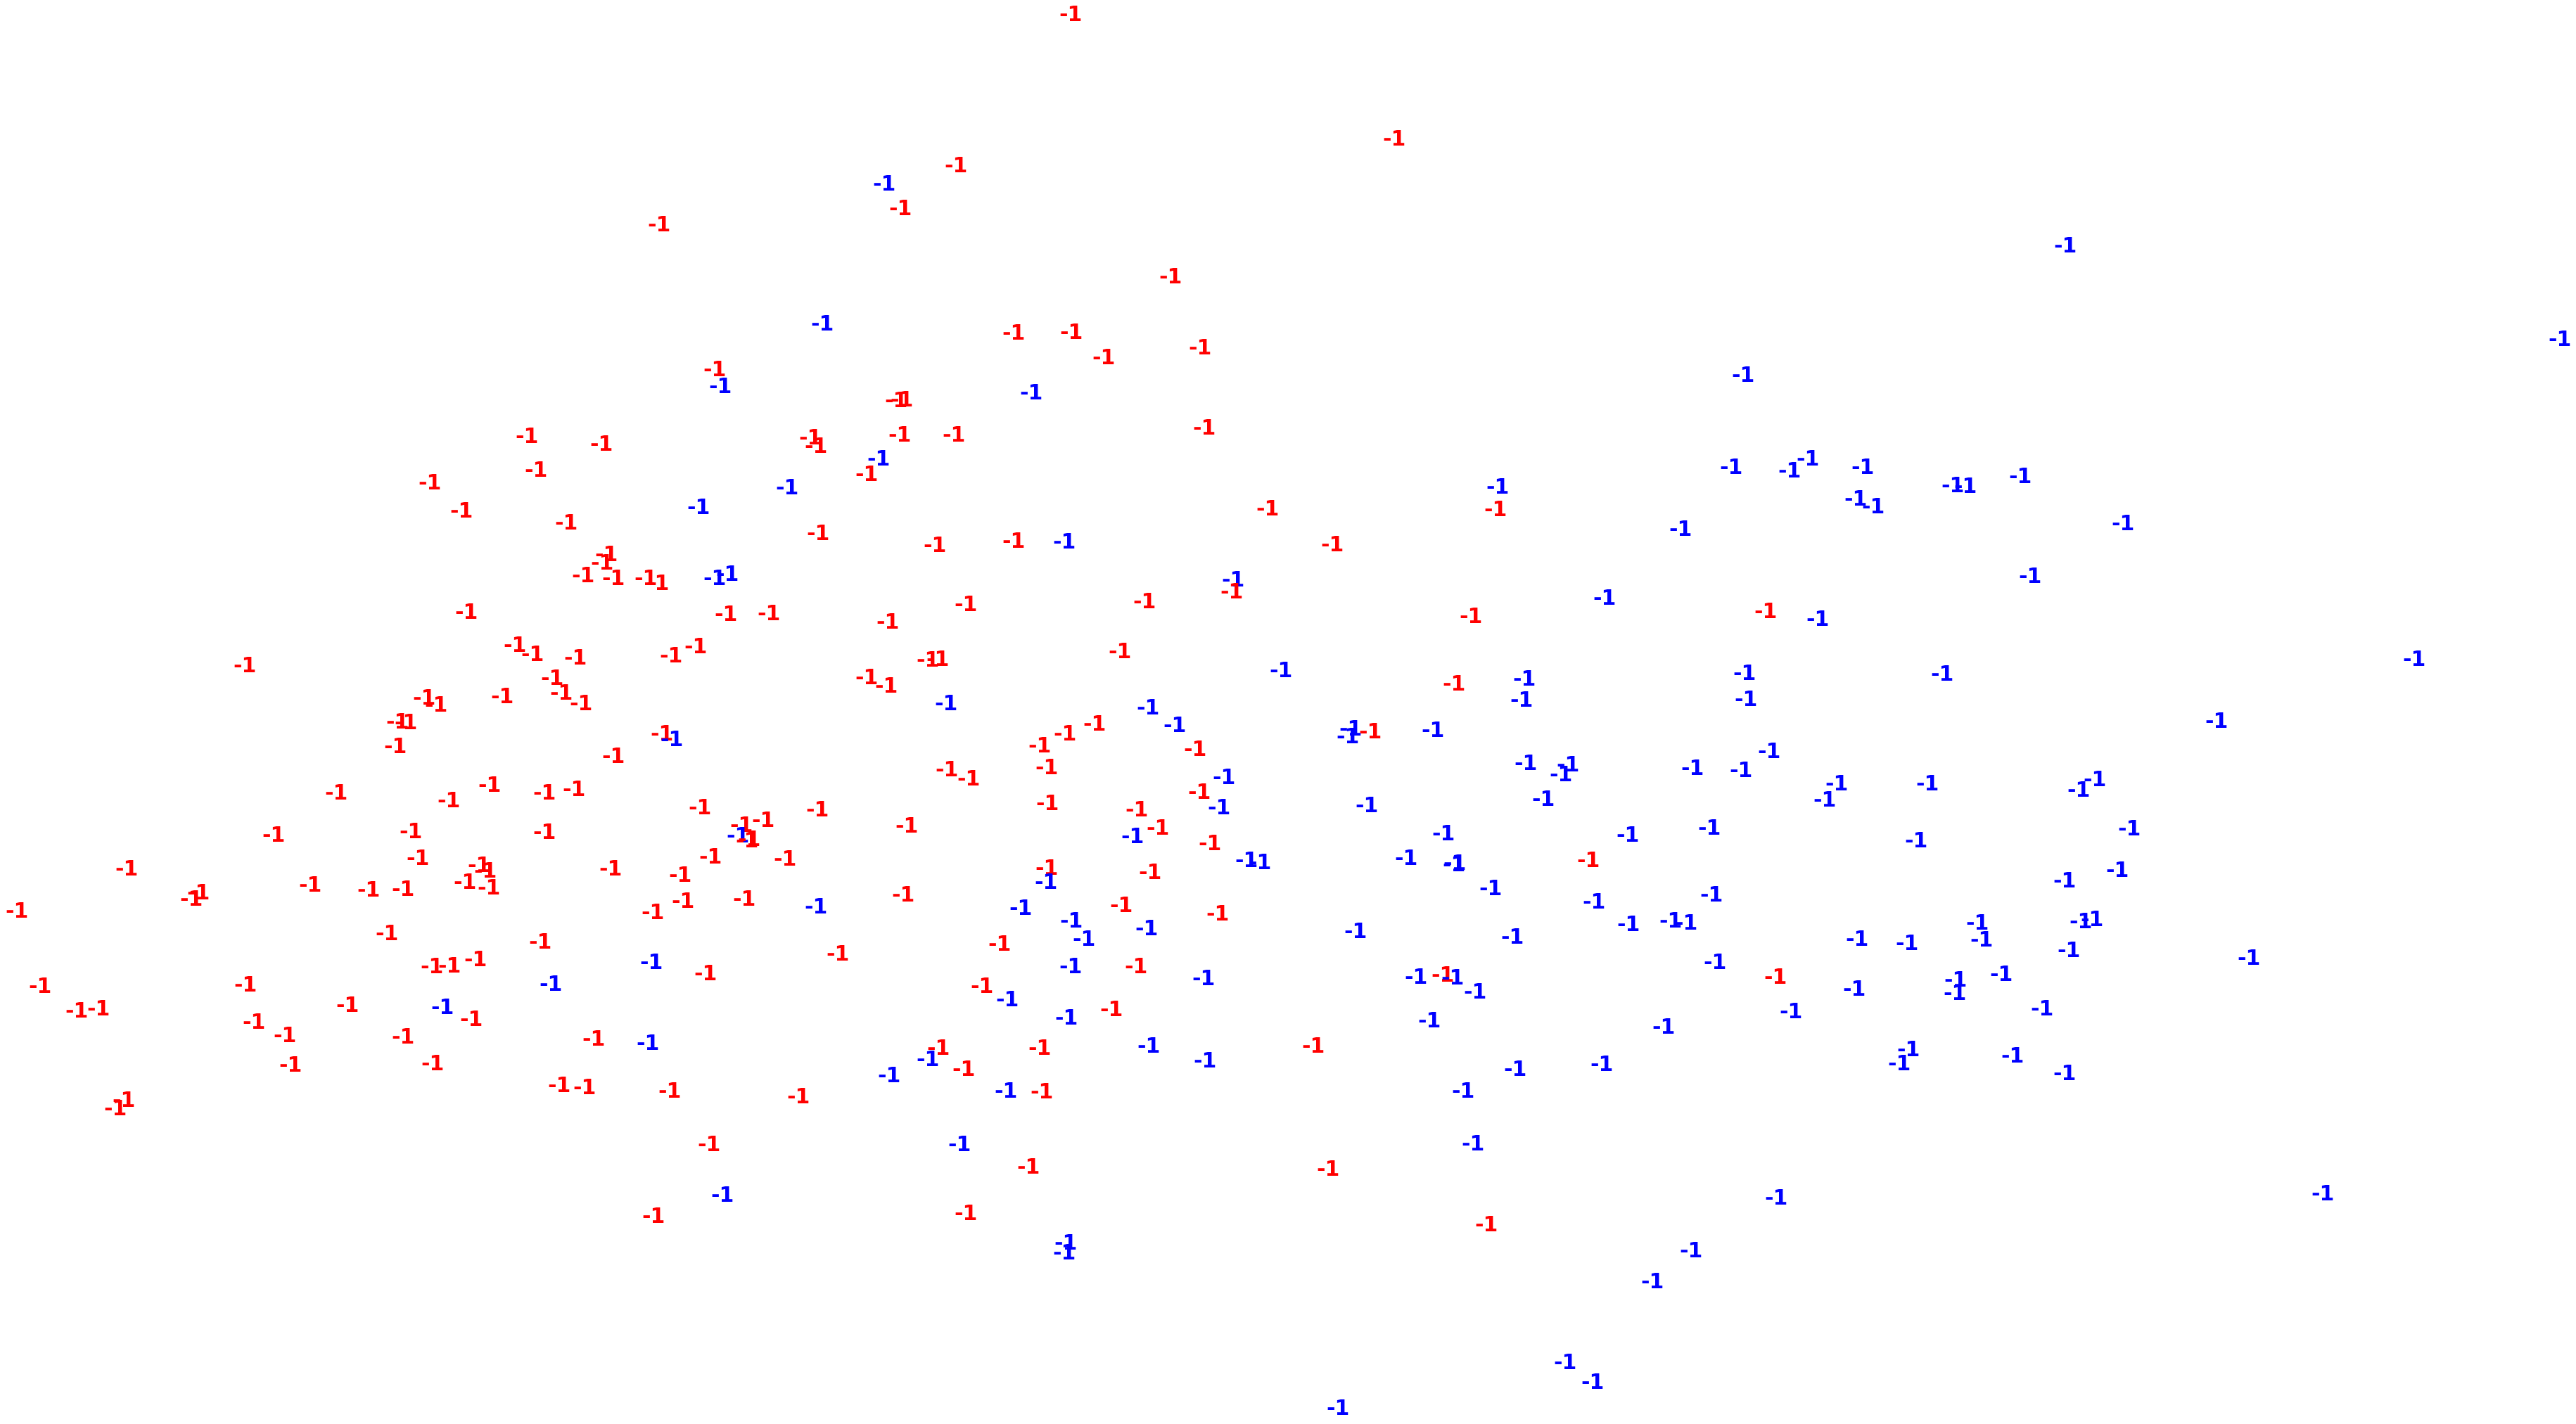

The (Prediction & Count) pairs:
 [(-1, 303)]


In [9]:
# default DBSCAN values where eps=0.5 & min_samples=5
try0 = dbscan_predict()

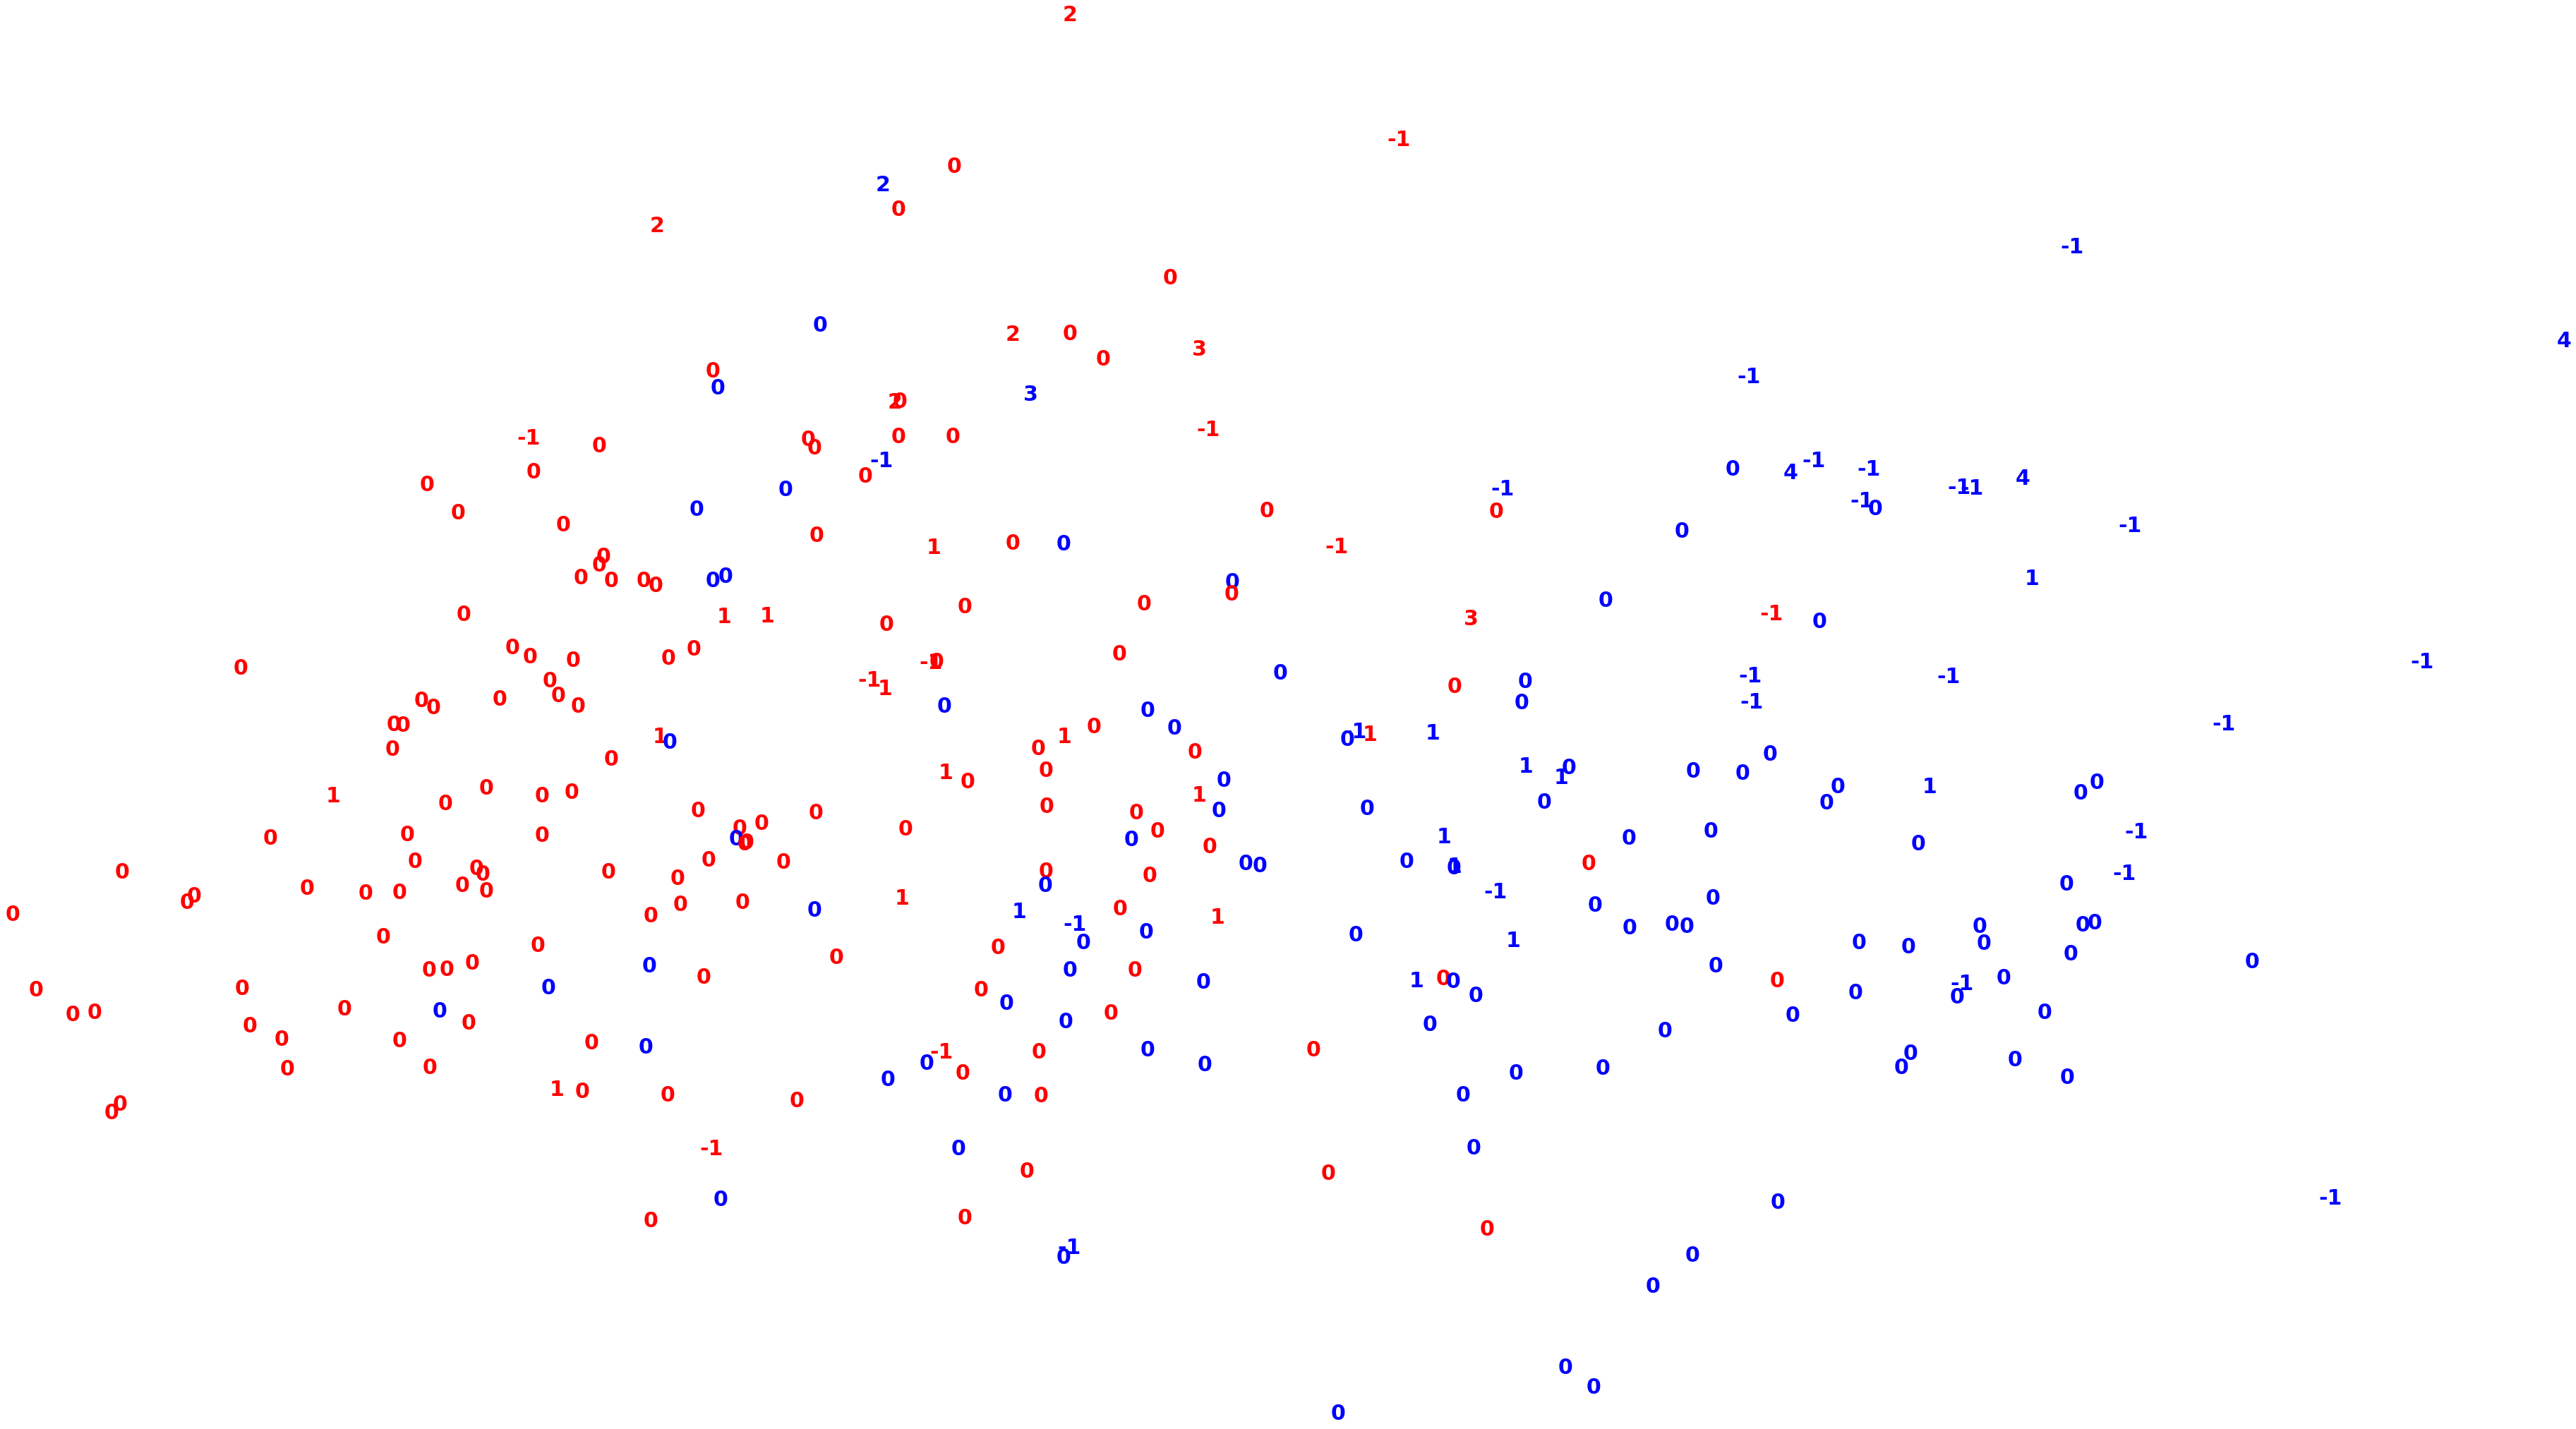

The (Prediction & Count) pairs:
 [(-1, 32), (0, 237), (1, 23), (2, 5), (3, 3), (4, 3)]


In [16]:
try1 = dbscan_predict(3, 3)

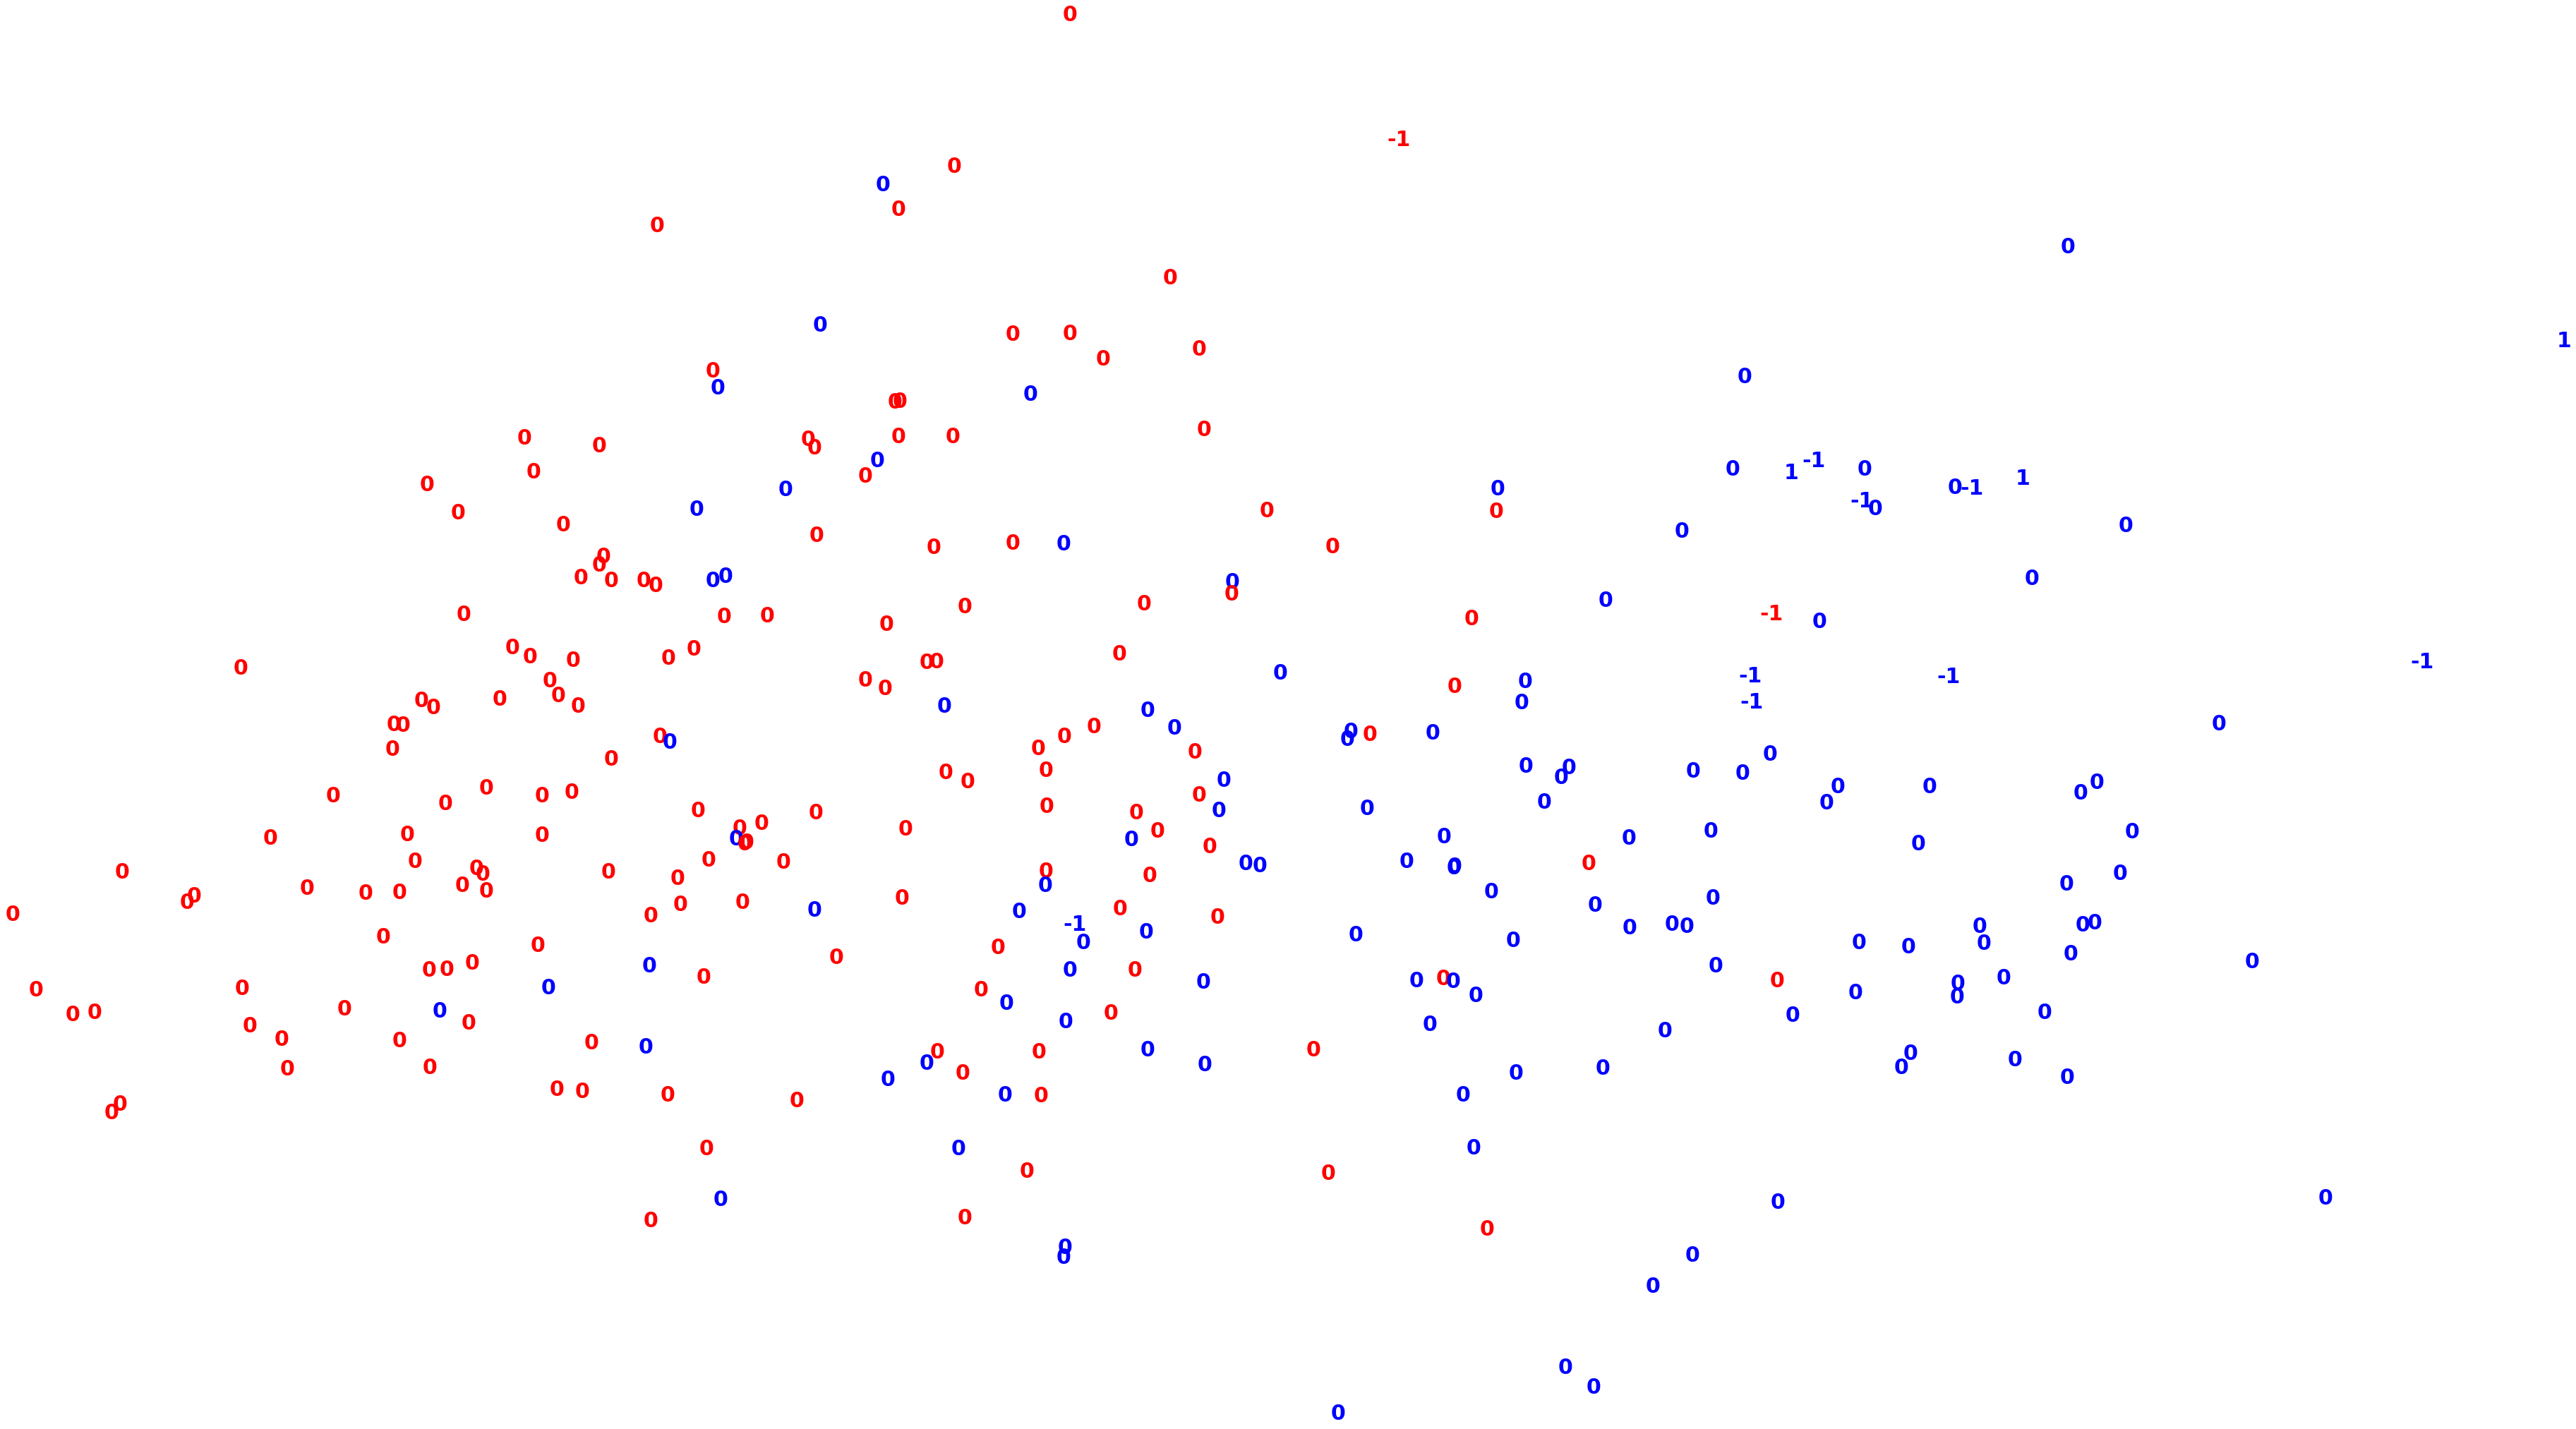

The (Prediction & Count) pairs:
 [(-1, 10), (0, 290), (1, 3)]


In [11]:
try2 = dbscan_predict(3.5, 3)

***
## Soru 2:

In [12]:
# model starts with eps = 1, min_samples = 1, metric ="euclidean"
# then "min_samples" changes
df_minsamples = pd.DataFrame(columns=("Min. Samples", "Clusters"))
for i in range(1,6):
    cluster_count = len(np.unique(dbscan_predict(eps=1,
                                                 min_samples=i, 
                                                 show_figure=False)))
    df_minsamples = df_minsamples.append({"Min. Samples":i, 
                                          "Clusters":cluster_count}, 
                                         ignore_index=True)
df_minsamples

,Min. Samples,Clusters
0,1,294
1,2,9
2,3,2
3,4,1
4,5,1


***
## Soru 3:

In [13]:
# model starts with eps = 1, min_samples = 1, metric ="euclidean"
# then "epsilon" changes
df_epsilon = pd.DataFrame(columns=("Epsilon Value", "Clusters"))
for i in np.arange(1,5,0.5):
    cluster_count = len(np.unique(dbscan_predict(eps=i,
                                                 min_samples=1, 
                                                 show_figure=False)))
    df_epsilon = df_epsilon.append({"Epsilon Value":i,
                                    "Clusters":cluster_count},
                                   ignore_index=True)
    df_epsilon.Clusters = df_epsilon.Clusters.astype("int64")
df_epsilon

,Epsilon Value,Clusters
0,1.0,294
1,1.5,252
2,2.0,178
3,2.5,84
4,3.0,34
5,3.5,11
6,4.0,3
7,4.5,1


**Yorum:**
* Epsilon değeri yükseldikçe, veri grupları kalabalıklaşarak küme sayısı düşmektedir. Modelimiz, yarıçapı büyüttükçe, tüm verileri tek bir kümeye dahil edecektir. 
* Ayrıca min_samples değeri arttıkça, benzer şekilde modelimiz hemen hiçbir veriyi bir araya toplayamamakta, bir çoğunu aykırı değer olarak işaretlemektedir. Bunun ana nedenlerinden biri de verilerimizin çok dağınık olmasıdır.
* Yine bu yüzden, verilerimizi 2 farklı kümeye ayırmamız oldukça zordur.